# 0. Introdução

A análise abaixo foi feita utilizando dados do IMDB que foram disponibilizados no site [Kaggle](https://www.kaggle.com)

Nosso objetivo é compreender melhor os padrões e características presentes nesses filmes, como diretores mais frequentes, gêneros dominantes, variações ao longo das décadas e possíveis correlações entre duração, nota e popularidade. Isso pode nos ajudar a entender o que torna um filme altamente valorizado pelo público, além de oferecer insights interessantes para fãs de cinema, críticos e até profissionais da área audiovisual.

<b>Perguntas que tentaremos responder com a análise:</b>

1. Quantos filmes foram lançados por década?
2. Qual o filme mais antigo e o mais recente?
3. Qual é o filme com a maior nota?
4. Existe uma relação entre a duração do filme e sua nota?
5. Qual é a distribuição dos filmes por ano?
6. Os filmes mais antigos são melhor avaliados que os recentes?
7. Existem filmes muito longos na lista?

Fonte do dataset: [IMDb (Top 250)](https://www.kaggle.com/datasets/allubie/imdb-top-250-movies)



# 1. Carregando Bibliotecas

In [34]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# 2. Carregando Dataset

In [23]:
df = pd.read_csv('imdb_top_250.csv')

In [25]:
df.head()

,Rank,Title,Year,Rating,Runtime
0,1,The Shawshank Redemption,1994,9.3,142
1,2,The Godfather,1972,9.2,175
2,3,The Dark Knight,2008,9.0,152
3,4,The Godfather Part II,1974,9.0,202
4,5,12 Angry Men,1957,9.0,96


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     250 non-null    int64  
 1   Title    250 non-null    object 
 2   Year     250 non-null    int64  
 3   Rating   250 non-null    float64
 4   Runtime  250 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 9.9+ KB


In [29]:
df.shape

(250, 5)

In [31]:
df.columns

Index(['Rank', 'Title', 'Year', 'Rating', 'Runtime'], dtype='object')

# 3. Análise de dados

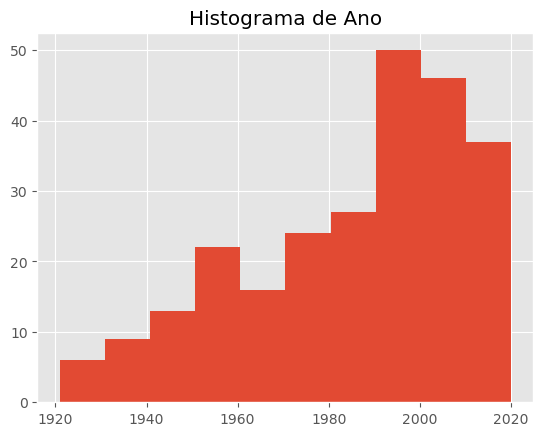

In [46]:
_= plt.hist(df.Year)
_= plt.title("Histograma de Ano")

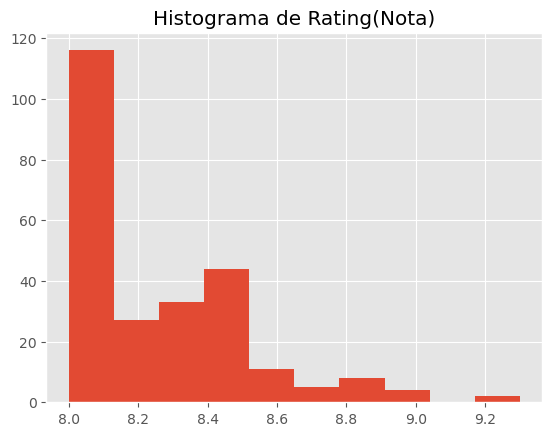

In [52]:
_= plt.hist(df.Rating)
_= plt.title("Histograma de Rating(Nota)")

# 4. Respostas dos questionamentos

<b>1. Quantos filmes foram lançados por década?</b>

In [61]:
df[['Title', 'Year']].head()

,Title,Year
0,The Shawshank Redemption,1994
1,The Godfather,1972
2,The Dark Knight,2008
3,The Godfather Part II,1974
4,12 Angry Men,1957


In [63]:
df['Decade'] = (df['Year'] // 10) * 10

In [65]:
filmes_por_decada = df['Decade'].value_counts().sort_index()
print(filmes_por_decada)

Decade
1920     6
1930     6
1940    13
1950    24
1960    17
1970    20
1980    30
1990    45
2000    47
2010    41
2020     1
Name: count, dtype: int64


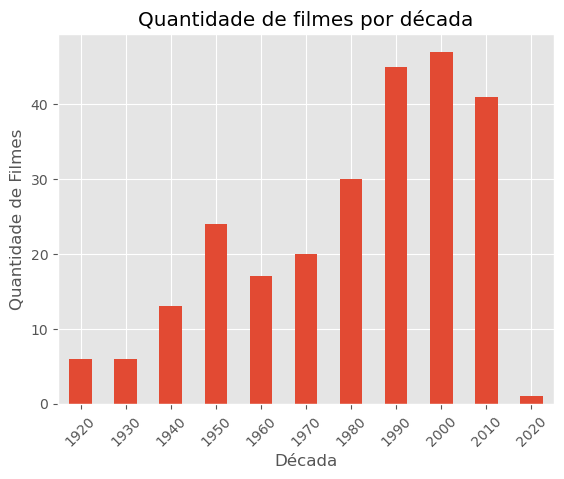

In [67]:
filmes_por_decada.plot(kind='bar')
plt.title('Quantidade de filmes por década')
plt.xlabel('Década')
plt.ylabel('Quantidade de Filmes')
plt.xticks(rotation=45)
plt.show()

<b> 2. Qual o filme mais antigo e o mais recente? </b>

In [73]:
df.sort_values(by= 'Year', ascending=True)

,Rank,Title,Year,Rating,Runtime,Decade
99,100,The Kid,1921,8.3,68,1920
182,183,Sherlock Jr.,1924,8.1,45,1920
179,180,The Gold Rush,1925,8.1,95,1920
167,168,The General,1926,8.1,78,1920
104,105,Metropolis,1927,8.3,153,1920
...,...,...,...,...,...,...
28,29,Parasite,2019,8.6,132,2010
247,248,Miracle in Cell No. 7,2019,8.0,132,2010
62,63,Joker,2019,8.4,122,2010
157,158,Klaus,2019,8.1,96,2010


- O Filme mais antigo, de acordo com o Rank é <b>The Kid.</b>

In [80]:
df.sort_values(by= 'Year', ascending=False)

,Rank,Title,Year,Rating,Runtime,Decade
117,118,Hamilton,2020,8.2,160,2020
247,248,Miracle in Cell No. 7,2019,8.0,132,2010
96,97,1917,2019,8.3,119,2010
62,63,Joker,2019,8.4,122,2010
28,29,Parasite,2019,8.6,132,2010
...,...,...,...,...,...,...
104,105,Metropolis,1927,8.3,153,1920
167,168,The General,1926,8.1,78,1920
179,180,The Gold Rush,1925,8.1,95,1920
182,183,Sherlock Jr.,1924,8.1,45,1920


- O Filme mais recente, de acordo com o Rank é <b>Hamilton</b>.

<b> 3. Qual é o filme com a maior nota?<b/>

In [86]:
df.sort_values(by= 'Rating', ascending= False)

,Rank,Title,Year,Rating,Runtime,Decade
0,1,The Shawshank Redemption,1994,9.3,142,1990
1,2,The Godfather,1972,9.2,175,1970
2,3,The Dark Knight,2008,9.0,152,2000
3,4,The Godfather Part II,1974,9.0,202,1970
4,5,12 Angry Men,1957,9.0,96,1950
...,...,...,...,...,...,...
212,213,Cool Hand Luke,1967,8.0,127,1960
213,214,To Be or Not to Be,1942,8.0,99,1940
214,215,The Battle of Algiers,1966,8.0,121,1960
215,216,Hachi: A Dog's Tale,2009,8.0,93,2000


- O filme com a maior nota, de acordo com o Rank é <b>The Shawshank Redemption</b>

<b> 4. Existe uma relação entre a duração do filme e sua nota? </b>

In [95]:
df[['Runtime', 'Rating']].head()


,Runtime,Rating
0,142,9.3
1,175,9.2
2,152,9.0
3,202,9.0
4,96,9.0


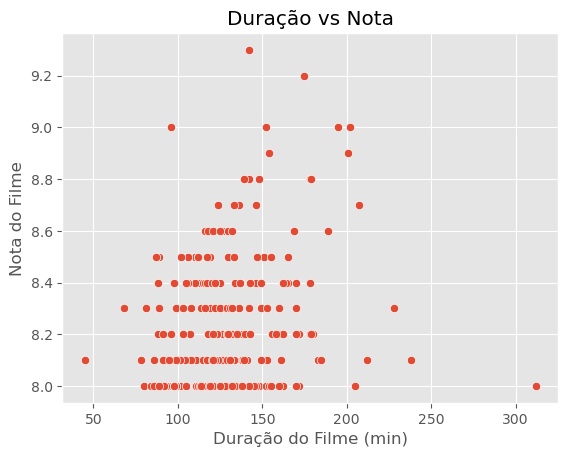

In [99]:
sns.scatterplot(data=df, x='Runtime', y='Rating')
plt.title('Duração vs Nota')
plt.xlabel('Duração do Filme (min)')
plt.ylabel('Nota do Filme')
plt.show()

In [103]:
correlacao = df['Runtime'].corr(df['Rating'])
print(f"Correlação entre duração e nota: {correlacao}")

Correlação entre duração e nota: 0.23069025078320635


- Esse valor representa uma correlação positiva fraca entre a duração do filme e sua nota.
- <b>O que isso significa na prática?</b><br>
Existe uma leve tendência de que filmes mais longos recebam notas um pouco maiores, mas essa relação não é forte o suficiente para fazer previsões confiáveis com base apenas na duração

.
<b>5. Qual é a distribuição dos filmes por ano? </b>



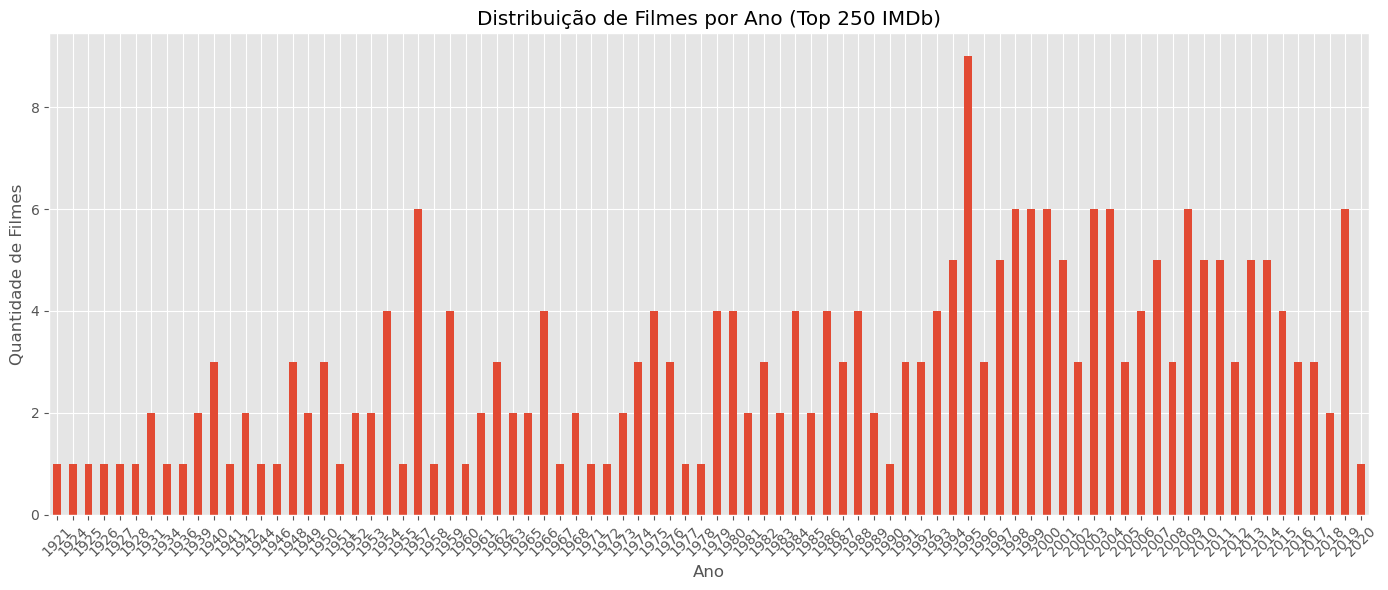

In [123]:
filmes_por_ano = df['Year'].value_counts().sort_index()

plt.figure(figsize=(14,6))
filmes_por_ano.plot(kind='bar')
plt.title('Distribuição de Filmes por Ano (Top 250 IMDb)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Filmes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<b>6. Os filmes mais antigos são melhor avaliados que os recentes?</b>

In [144]:
notas_por_ano = df.groupby('Year')['Rating'].mean()

In [148]:
notas_por_ano = notas_por_ano.sort_index()

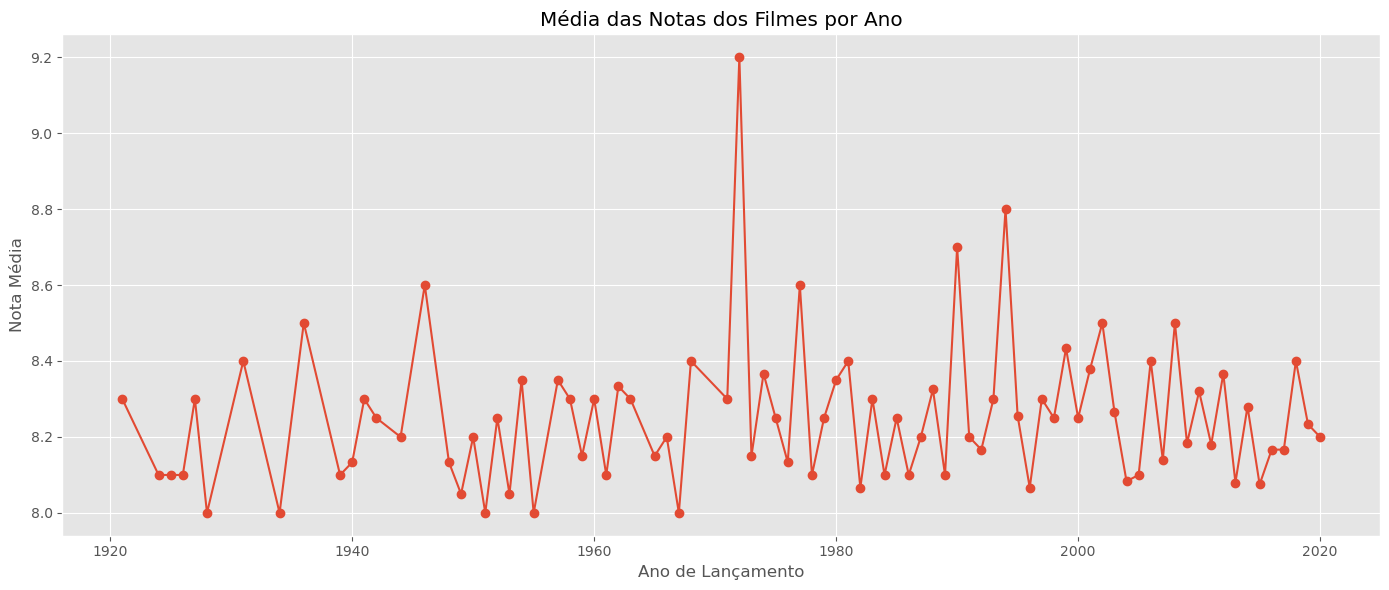

In [150]:
plt.figure(figsize=(14,6))
notas_por_ano.plot(kind='line', marker='o')
plt.title('Média das Notas dos Filmes por Ano')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Nota Média')
plt.grid(True)
plt.tight_layout()
plt.show()

In [152]:
correlacao = df['Year'].corr(df['Rating'])
print(f"Correlação entre ano e nota: {correlacao}")

Correlação entre ano e nota: 0.04309677333591682


- Filmes mais antigos não são necessariamente melhor avaliados que os recentes (e vice-versa). 
- As notas parecem distribuídas de forma equilibrada ao longo do tempo dentro do Top 250.
- Isso faz sentido: como são todos filmes bem avaliados, o fator "ano" não pesa tanto na seleção. 

<b> 7. Existem filmes muito longos na lista? </b>

In [158]:
df['Runtime'].describe()

count    250.000000
mean     129.108000
std       31.573468
min       45.000000
25%      107.000000
50%      126.000000
75%      144.500000
max      312.000000
Name: Runtime, dtype: float64

In [160]:
df.sort_values(by='Runtime', ascending=False).head(10)


,Rank,Title,Year,Rating,Runtime,Decade
233,234,Fanny and Alexander,1982,8.0,312,1980
149,150,Gone with the Wind,1939,8.1,238,1930
86,87,Lawrence of Arabia,1962,8.3,228,1960
170,171,Ben-Hur,1959,8.1,212,1950
18,19,Seven Samurai,1954,8.7,207,1950
210,211,Andrei Rublev,1966,8.0,205,1960
3,4,The Godfather Part II,1974,9.0,202,1970
6,7,The Lord of the Rings: The Return of the King,2003,8.9,201,2000
5,6,Schindler's List,1993,9.0,195,1990
27,28,The Green Mile,1999,8.6,189,1990


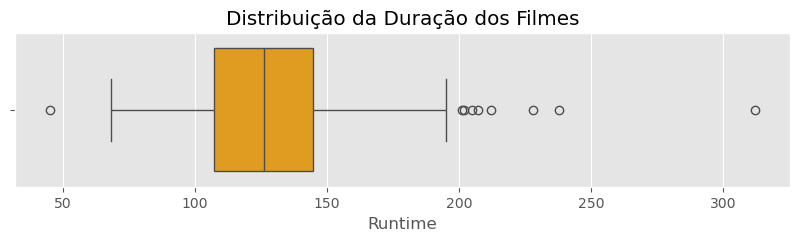

In [162]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['Runtime'], color='orange')
plt.title('Distribuição da Duração dos Filmes')
plt.show()

In [164]:
limite_superior = df['Runtime'].mean() + 2 * df['Runtime'].std()
df[df['Runtime'] > limite_superior]

,Rank,Title,Year,Rating,Runtime,Decade
3,4,The Godfather Part II,1974,9.0,202,1970
5,6,Schindler's List,1993,9.0,195,1990
6,7,The Lord of the Rings: The Return of the King,2003,8.9,201,2000
18,19,Seven Samurai,1954,8.7,207,1950
86,87,Lawrence of Arabia,1962,8.3,228,1960
149,150,Gone with the Wind,1939,8.1,238,1930
170,171,Ben-Hur,1959,8.1,212,1950
210,211,Andrei Rublev,1966,8.0,205,1960
233,234,Fanny and Alexander,1982,8.0,312,1980


- Ao analisar a duração dos filmes da lista, observamos que, apesar da média girar em torno de 2 horas, existem títulos que se destacam pela sua longa duração, chegando a ultrapassar 5 horas no caso de <b>Fanny and Alexander</b>. Esses outliers geralmente pertencem ao gênero épico ou dramático, com narrativas mais densas e complexas, o que justifica o tempo estendido.



### 5. Conclusão

A partir da análise dos 250 filmes mais bem avaliados do IMDb, observamos que:
- A maioria dos filmes está concentrada nas décadas de 1990 a 2010.
- Filmes mais longos tendem a ter notas ligeiramente maiores, embora a correlação seja fraca.
- A nota média dos filmes não varia muito com o ano de lançamento.
- Filmes com mais de 200 minutos são minoria, sendo o mais longo "Fanny and Alexander" com 312 minutos.

